Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [18]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [19]:
# df_path = "C:\\Users\\muthusamy\\Downloads\\Online Retail.xlsx"
df = pd.read_excel('Online Retail.xlsx')
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [20]:
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [21]:
print(df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [22]:
dimensions = df.shape
print("Dimensions: ", dimensions)

unique_invoices = df['InvoiceNo'].nunique()
unique_customers = df['CustomerID'].nunique()

print("Number of unique invoice numbers:", unique_invoices)
print("Number of unique customer identifications:", unique_customers)



Dimensions:  (541909, 8)
Number of unique invoice numbers: 25900
Number of unique customer identifications: 4372


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [23]:
df['IsCPresent'] = df['InvoiceNo'].str.startswith('C')

print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country IsCPresent  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        NaN  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdo

b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [24]:
df_zero = df[df['Quantity'] > 0]
print(df_zero.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country IsCPresent  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        NaN  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdo

In [25]:
df_remove = df_zero[~(df_zero['IsCPresent'].fillna(False))]
print(df_remove.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country IsCPresent  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        NaN  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        NaN  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        NaN  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        NaN  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        NaN  


In [26]:
df_subset = df_remove[['InvoiceNo', 'Description']]
df_dropna = df_subset.dropna()
print(df_subset.head())

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.


In [27]:
df_dropna.shape

(530693, 2)

In [30]:
online1 = df_dropna
print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


In [31]:
online1.shape

(530693, 2)

c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)

--
### Edit to write your answer here

In [32]:
orig_dim = df.shape
clean_dim = online1.shape

rows_rm = orig_dim[0] - clean_dim[0]
invoices_rm = df['InvoiceNo'].nunique() - online1['InvoiceNo'].nunique()

print(f"Number of rows removed: {rows_rm}")
print(f"Number of invoice numbers removed: {invoices_rm}")


Number of rows removed: 11216
Number of invoice numbers removed: 5764


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [34]:
unique_invoices = list(set(online1['InvoiceNo']))
print(len(online1))
print("Number of unique invoice numbers:", len(unique_invoices))



530693
Number of unique invoice numbers: 20136


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [35]:
cut_invoices = unique_invoices[:5000]
print("Number of elements:", len(cut_invoices))



Number of elements: 5000


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [36]:
online1_filter = online1[online1['InvoiceNo'].isin(cut_invoices)]
print(online1_filter.head(10))


  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [37]:
print("Dimensions of the DataFrame (online1):", online1.shape)

# Print the number of unique invoice numbers in online1
unique_invoices_online1 = online1['InvoiceNo'].nunique()
print("Number of unique invoice numbers in online1:", unique_invoices_online1)


Dimensions of the DataFrame (online1): (530693, 2)
Number of unique invoice numbers in online1: 20136


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [39]:
# Initialize the list to store items for each invoice
items_by_invoice = []

# Iterate over unique invoice numbers
for inv_no in cut_invoices:
    # Extract item descriptions for the current invoice number
    items = online1.loc[online1['InvoiceNo'] == inv_no, 'Description'].tolist()

    # Append the item descriptions list to items_by_invoice
    items_by_invoice.append(items)

# Print elements one through four of the list
print("First 4 elements in items_by_invoice:")
for i in range(4):
    print(items_by_invoice[i])



First 4 elements in items_by_invoice:
['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [40]:
from mlxtend.preprocessing import TransactionEncoder

items_no_nan = [[item if not pd.isna(item) else "NaN" for item in invoice] for invoice in items_by_invoice]

# Initialize and fit the TransactionEncoder
te = TransactionEncoder()
encoded = te.fit(items_no_nan).transform(items_no_nan)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded, columns=te.columns_)

# Print an example of the resulting encoded data
print("Sample encoded data:")
print(encoded_df.head(3))  # Printing the first three rows for illustration




Sample encoded data:
    4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
0                           False                        False   
1                           False                        False   
2                           False                        False   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                             False                    False   
1                             False                    False   
2                             False                    False   

   *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  False                    False                   False   
2                  False                    False                   False   

   12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                       False                      False   
1                       Fals

b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [41]:
# Simplified variable name
encoded_df = pd.DataFrame(encoded, columns=te.columns_)

# Print a predefined subset of the DataFrame
subset = encoded_df.iloc[:5, :10]  # Adjust the subset as needed
print("Example subset of encoded DataFrame:")
print(subset)


Example subset of encoded DataFrame:
    4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
4                           False                        False   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

   *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  False   

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [42]:
print("Dimensions of the encoded DataFrame (online_encoder_df):", encoded_df.shape)


Dimensions of the encoded DataFrame (online_encoder_df): (5000, 3135)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [43]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


1. Load the wholesale customers dataset (1 point)

In [44]:
data = pd.read_csv("wholesale_customers_data.csv")
data.head(10)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


2. Drop Channel & Region and print the current columns ( 1 point)

In [46]:
# Drop 'Channel' and 'Region' columns
data_dropped = data.drop(['Channel', 'Region'], axis=1)

# Print the updated columns
print("Columns after dropping:")
print(data_dropped.columns)
data_dropped.head()


Columns after dropping:
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [47]:
# Simplify the variable name
summary = data_dropped.describe()

# Print the statistical summary
print("Statistical summary:")
print(summary)



Statistical summary:
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

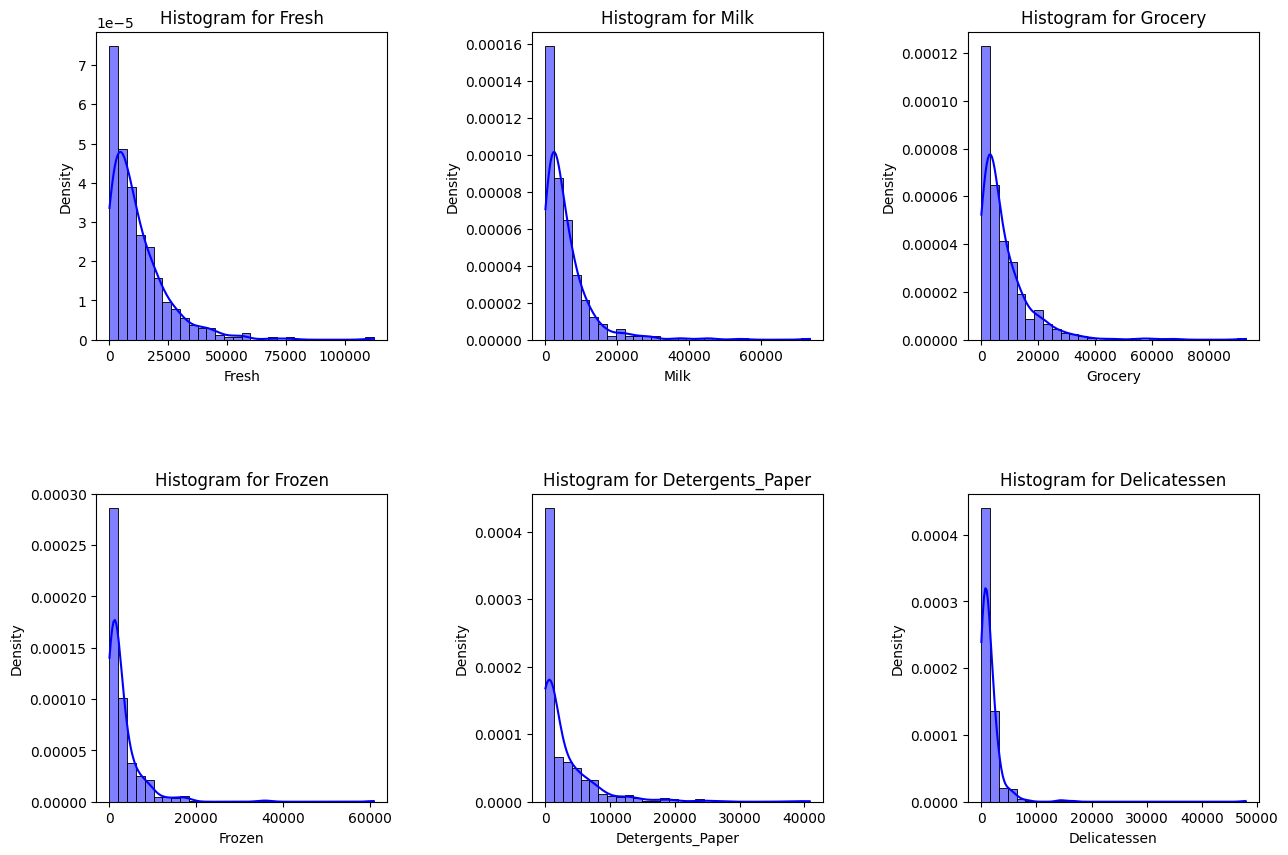

In [48]:
product_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
# Loop through columns and create plots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through each feature and create histograms
for i, category in enumerate(product_categories, 1):
    plt.subplot(2, 3, i)

    # Histogram
    sns.histplot(data_dropped[category], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Histogram for {category}')
    plt.xlabel(category)
    plt.ylabel('Density')

# Show the histograms
plt.show()



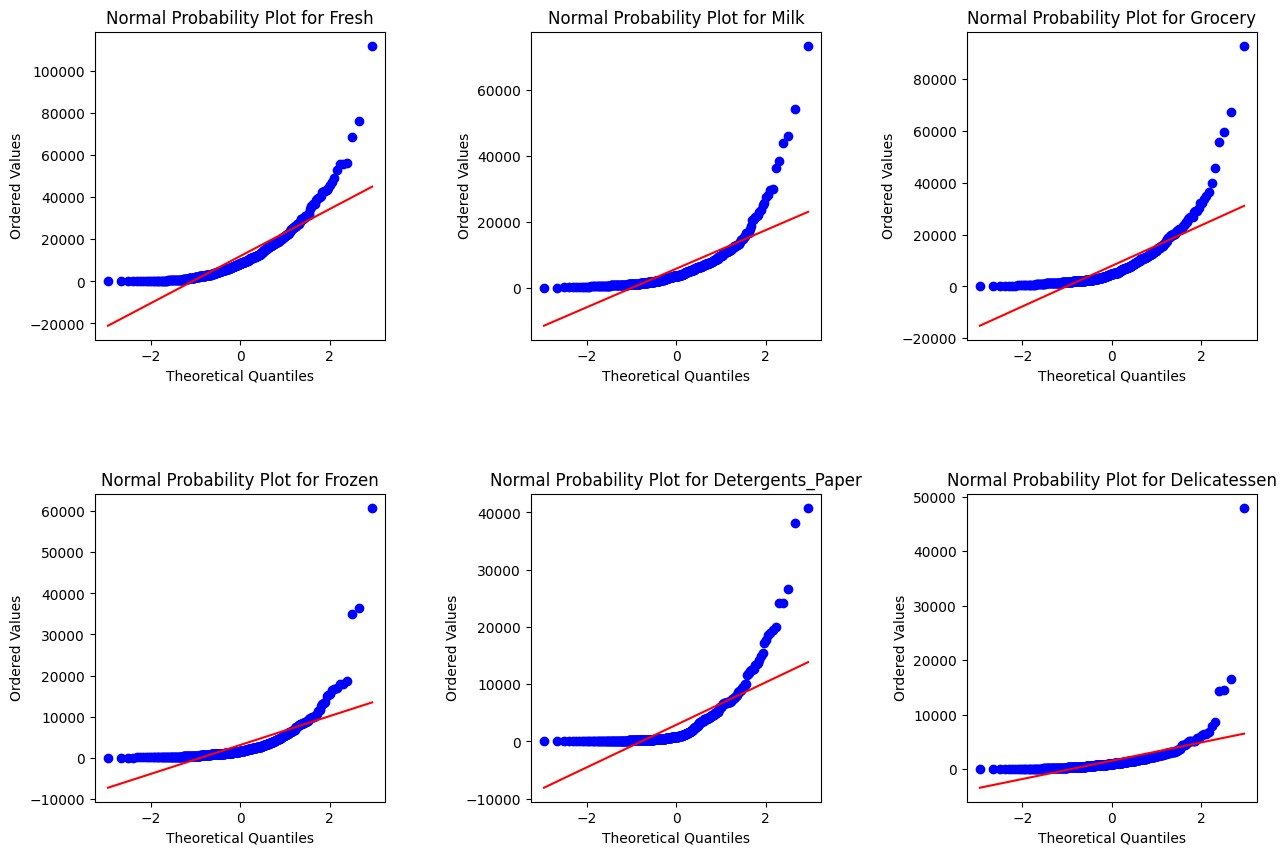

In [50]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through each feature and create normal probability plots
for i, category in enumerate(product_categories, 1):
    plt.subplot(2, 3, i)

    # Normal Probability Plot
    probplot(data_dropped[category], plot=plt)
    plt.title(f'Normal Probability Plot for {category}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

# Show the normal probability plots
plt.show()

5. What do you observe about distribution? (2 points)


The data is mostly normally distributed, as indicated by the normal probability plots for the several food groups, which show that most distributions are roughly symmetrical with a central peak and tapering tails. Nonetheless, several categories clearly exhibit outliers and skewness, which are departures from normalcy.

**Key Observations:**

Fresh: Slightly positively skewed with a longer right tail, indicating a few higher-value items.

Milk: Slightly negatively skewed with a longer left tail, showing more lower-value items.

Grocery: Symmetrical distribution with a clear central peak and balanced tails.

Frozen: Slight positive skew with a longer right tail, suggesting more higher-value items.

Detergents Paper: Slight negative skew with a longer left tail, showing more lower-value items.

Delicatessen: Relatively symmetrical distribution with balanced tails and a central peak.

**Although the data for the majority of categories generally approaches normality, some distributions do include small deviations, such as skewness and outliers**.

6. Scale the sample data using the natural logarithm ( 1 point)

In [51]:
data_log = np.log1p(data_dropped)

print("Sample data after scaling using natural logarithm:")
print(data_log.head())


Sample data after scaling using natural logarithm:
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446992  9.175438  8.930891  5.370638          7.891705      7.199678
1   8.861917  9.191259  9.166284  7.474772          8.099858      7.482682
2   8.756840  9.083529  8.947026  7.785721          8.165364      8.967632
3   9.492960  7.087574  8.348064  8.764834          6.230481      7.489412
4  10.026413  8.596189  8.881697  8.272826          7.483244      8.553718


7. Check for Outliers using boxplot ( 2 points)

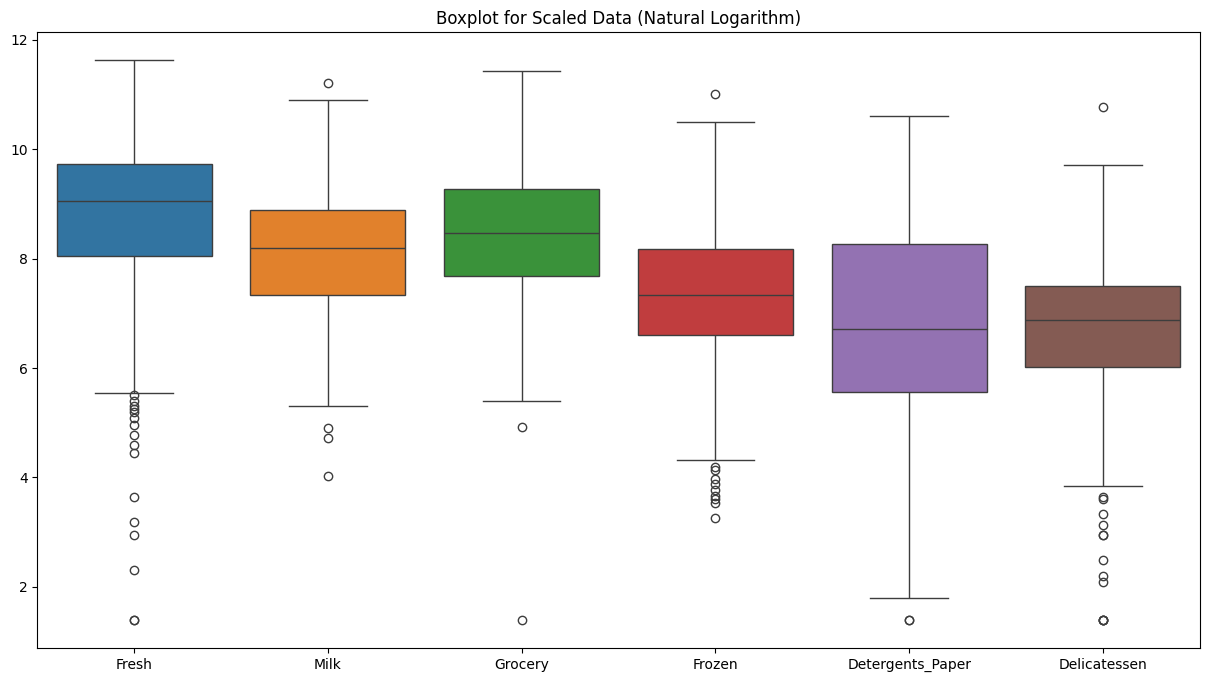

In [52]:
# write your code here
plt.figure(figsize=(15, 8))
plt.title('Boxplot for Scaled Data (Natural Logarithm)')

# Create a boxplot for each feature
sns.boxplot(data=data_log)

# Show the boxplot
plt.show()


8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

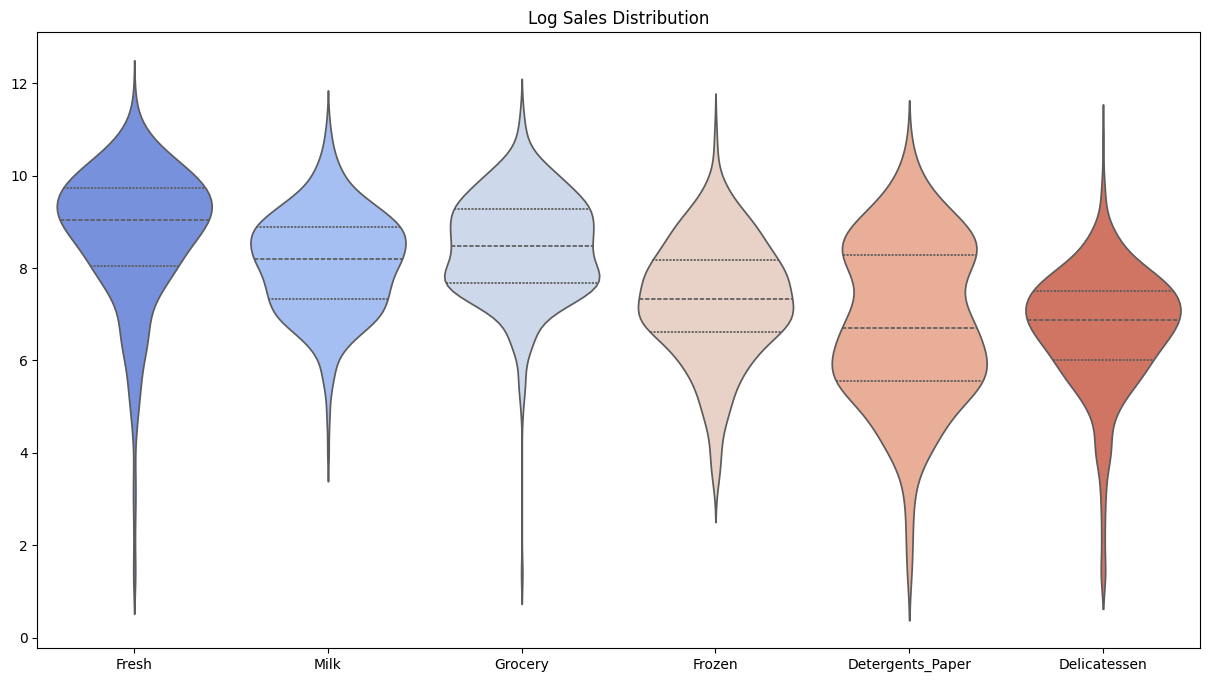

In [56]:
data_log = np.log1p(data_dropped)

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))
plt.title('Log Sales Distribution')

# Create a violin plot for the log-transformed data
sns.violinplot(data=wholesale_data_log, palette='coolwarm', inner='quartile')

# Show the violin plot
plt.show()


9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

Outliers removed. Clean data prepared for visualization.


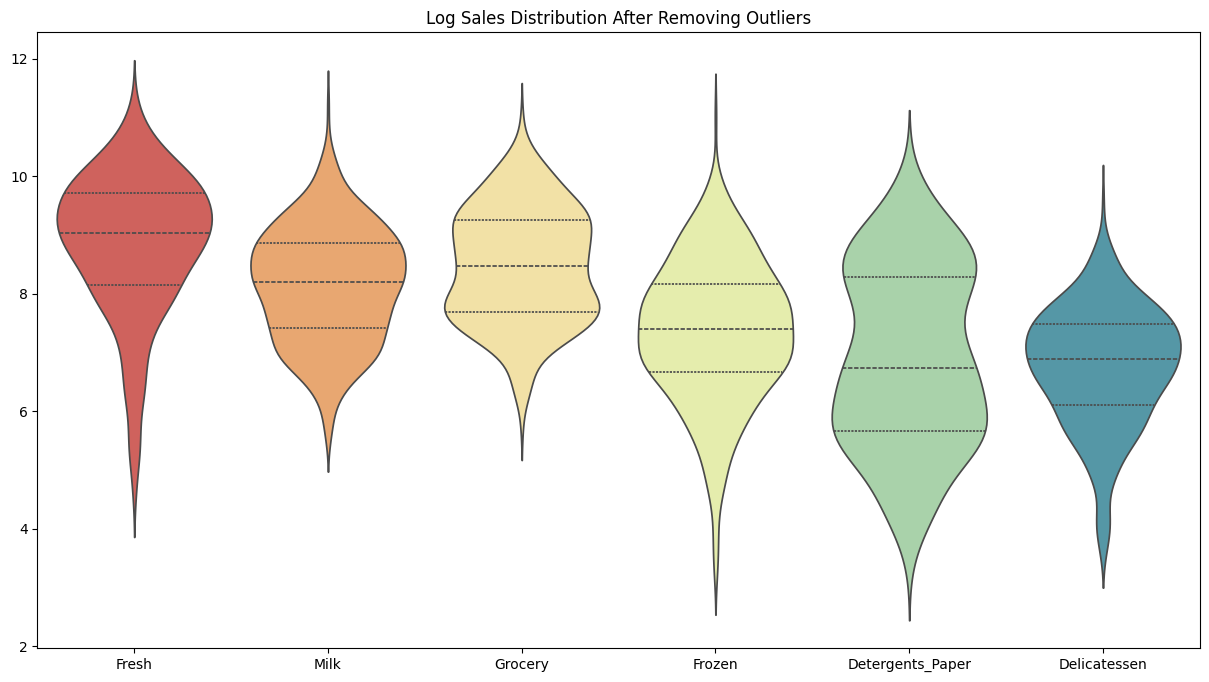

In [57]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Identify and remove outliers using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_log)
clean_data = data_log[outlier_labels == 1]

# Print confirmation
print("Outliers removed. Clean data prepared for visualization.")

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))
plt.title('Log Sales Distribution After Removing Outliers')

# Create a violin plot for the clean data
sns.violinplot(data=clean_data, palette='Spectral', inner='quartile')

# Show the violin plot
plt.show()



10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

<Figure size 1500x1500 with 0 Axes>

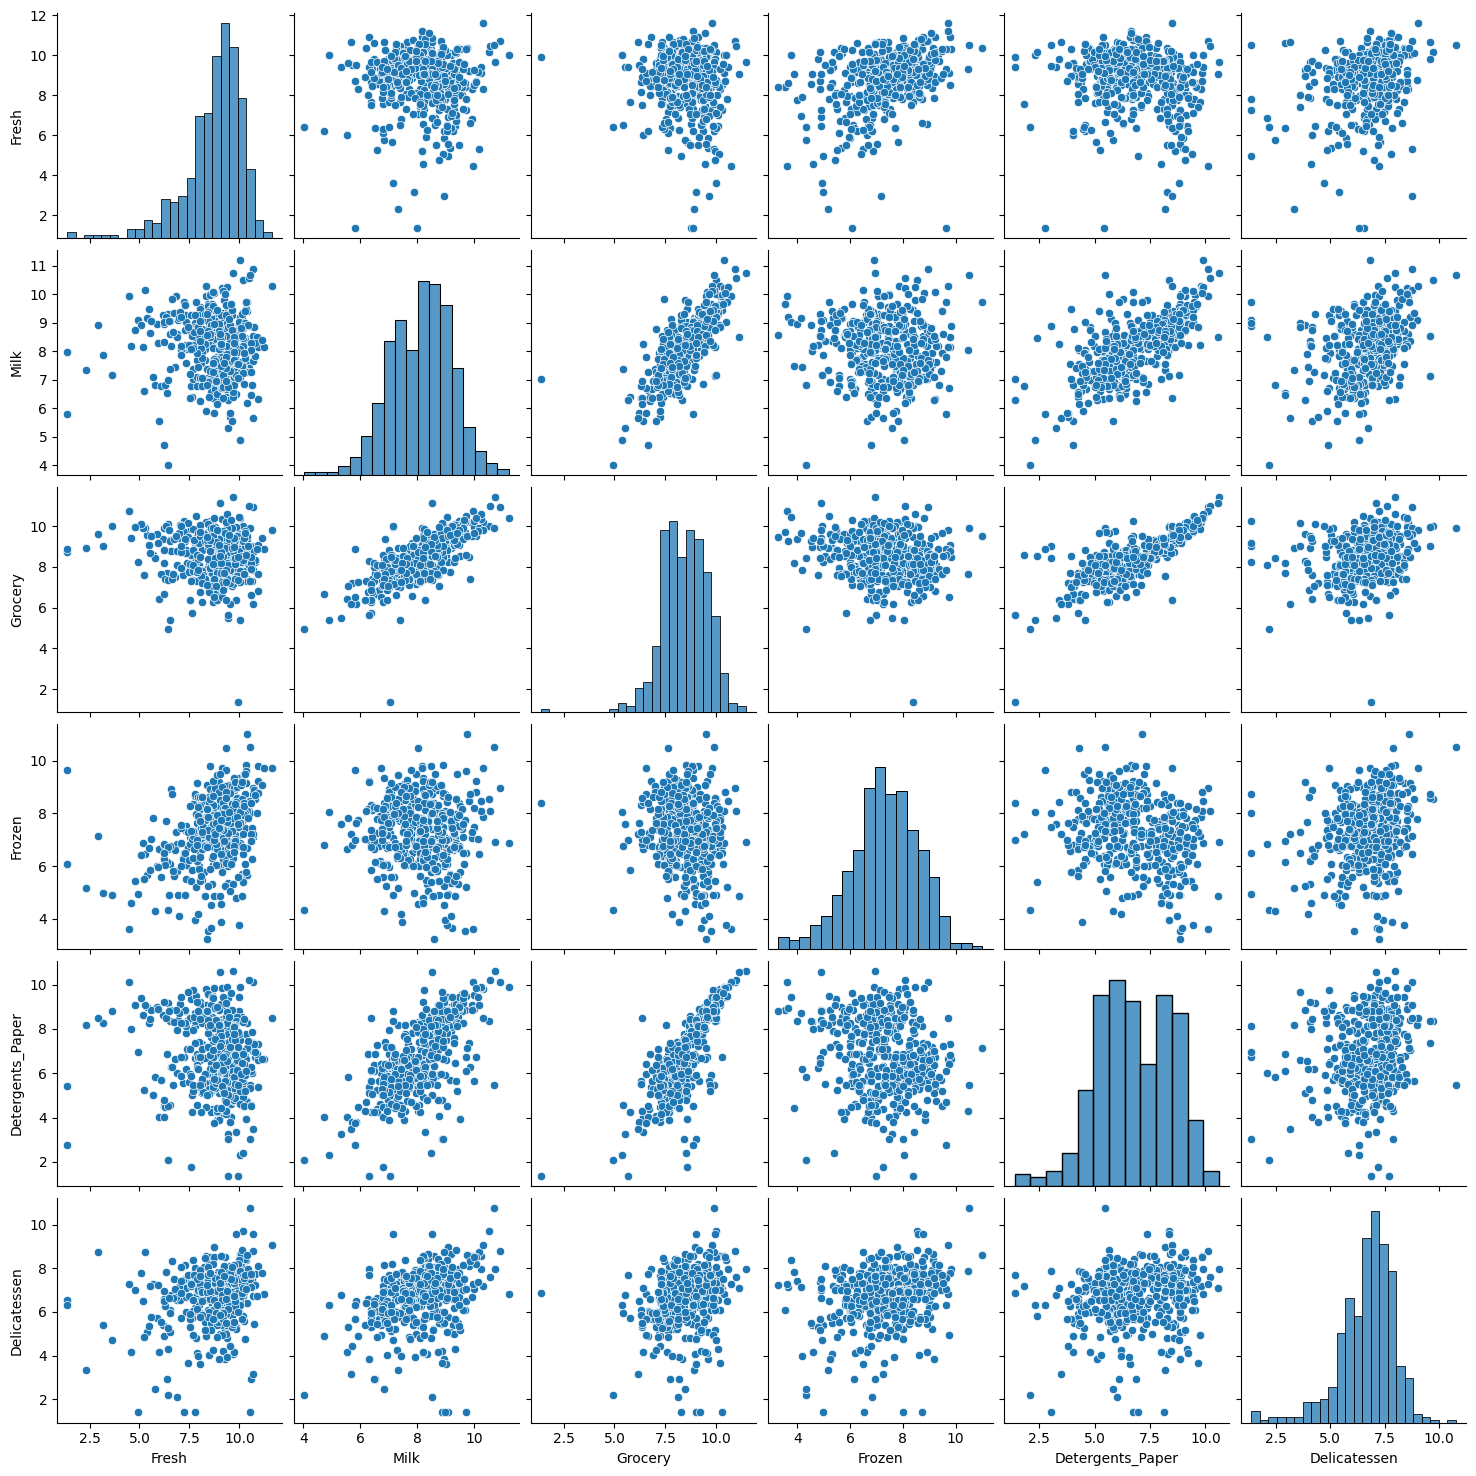

In [58]:
plt.figure(figsize=(15, 15))
sns.pairplot(data_log)

# Show the pairplot
plt.show()


11. Check for Correlations using sns.clustermap (2 points)

<Figure size 1000x1000 with 0 Axes>

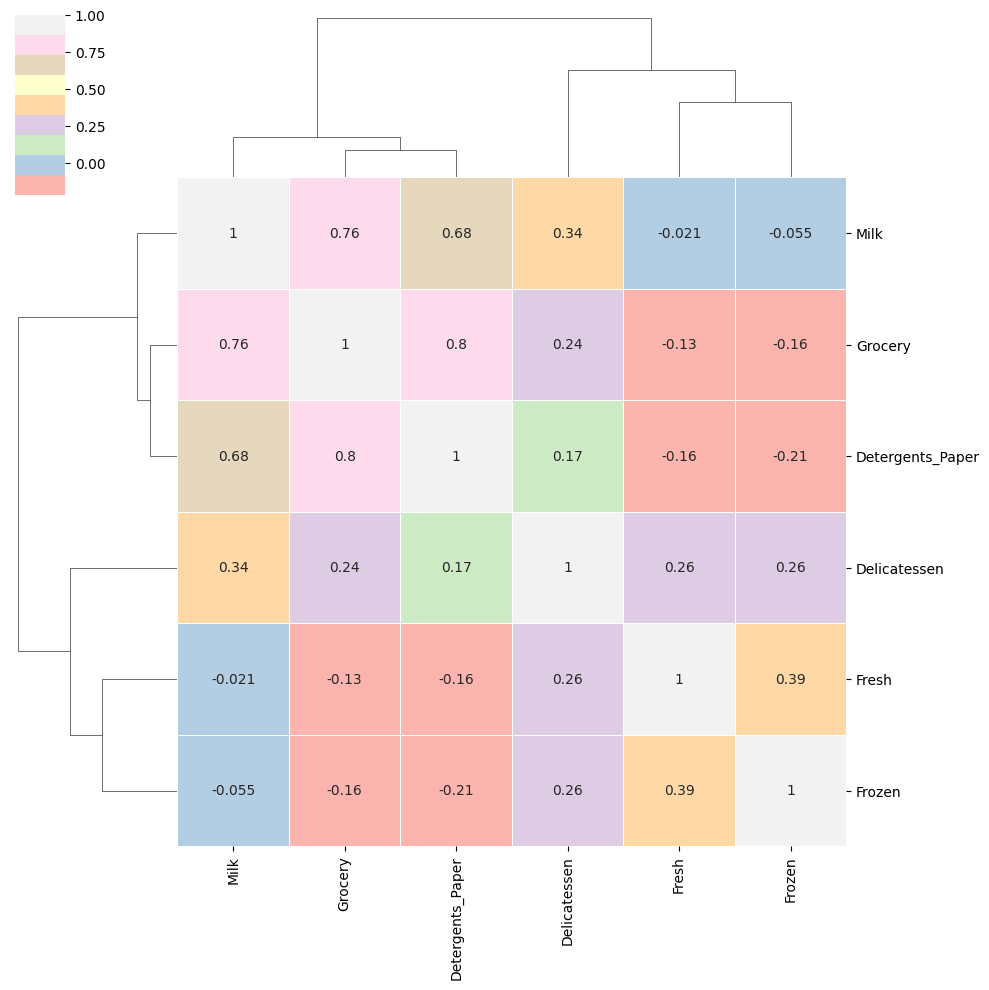

In [59]:
correlation_matrix = data_log.corr()

# Set up the clustermap
plt.figure(figsize=(10, 10))
sns.clustermap(correlation_matrix, cmap='Pastel1', annot=True, linewidths=.5)

# Show the clustermap
plt.show()


12. What do you observe? (2 points)


The analysis reveals Milk as the most frequently purchased food item, with particularly strong correlations to other product categories. The highest correlation is with Grocery at 0.76, indicating a strong positive relationship where customers who buy significant quantities of Milk are also likely to purchase large amounts of Grocery items. A moderate positive correlation of 0.68 exists with Detergents_Paper, suggesting these products are often bought together during comprehensive shopping trips. The correlation with Delicatessen shows a weaker positive relationship at 0.34, implying a less consistent purchasing pattern.

When examining the relationships with Fresh and Frozen categories, the correlations are notably weak and slightly negative (-0.021 and -0.055 respectively). These near-zero values suggest that Milk purchases are largely independent of Fresh and Frozen item acquisitions. The overall correlation matrix provides insights into consumer shopping behaviors, highlighting that Milk buyers are most likely to simultaneously purchase Grocery and Detergents_Paper items. This understanding can be valuable for retailers in developing strategic cross-selling approaches and optimizing inventory management to align with observed consumer purchasing patterns.

### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

In [61]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Assume data_cleaned is your cleaned and log-transformed data
# Replace it with your actual DataFrame if needed

# Instantiate the PCA model
pca = PCA()

# Fit the PCA model to the data
pca.fit(clean_data)

# Transform the data to its principal components
data_pca = pca.transform(clean_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

# Combine PCA components with the original data's index
biplot_df = pd.concat([pca_df, clean_data.reset_index()], axis=1)

# Create a biplot using plotly.express
fig = px.scatter(
    biplot_df,
    x='PC1',
    y='PC2',
    color='index',  # Assuming index is a categorical variable
    labels={'index': 'Observation'},
    hover_data=clean_data.columns,
    title='Biplot: Principal Components vs Original Features'
)

# Print the first few rows of the combined DataFrame
print(biplot_df.head())

# Show the biplot
fig.show()



        PC1       PC2       PC3       PC4       PC5       PC6  index  \
0  1.702193 -0.217796  1.520680  1.122112  0.280201 -0.352877      0   
1  1.629114  0.884964 -0.166545  0.209666  0.134878 -0.188727      1   
2  1.631535  1.624393 -0.838749  1.210745 -0.457853 -0.345795      2   
3 -1.381344  1.260090 -0.532708 -0.050477 -0.692446  0.561123      3   
4  0.461571  2.301617 -0.080962  0.765860 -0.349746 -0.004963      4   

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen  
0   9.446992  9.175438  8.930891  5.370638          7.891705      7.199678  
1   8.861917  9.191259  9.166284  7.474772          8.099858      7.482682  
2   8.756840  9.083529  8.947026  7.785721          8.165364      8.967632  
3   9.492960  7.087574  8.348064  8.764834          6.230481      7.489412  
4  10.026413  8.596189  8.881697  8.272826          7.483244      8.553718  


14. Use sns.jointplot to plot x and y in the above code (2 points)

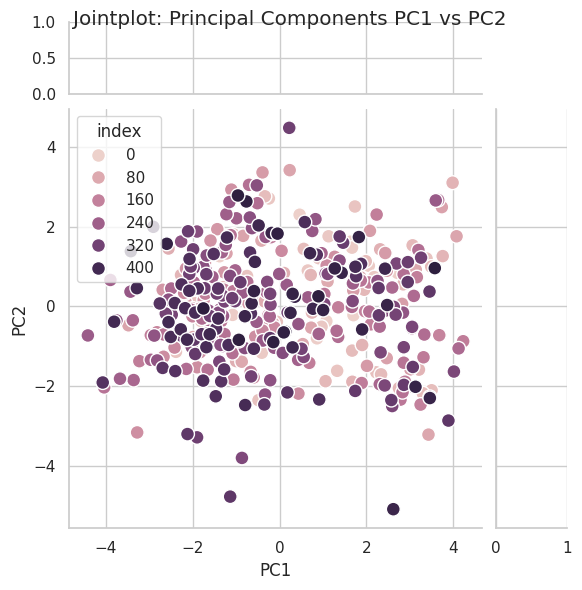

In [62]:
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
biplot_df = pd.concat([pca_df, clean_data.reset_index()], axis=1)

# Create a jointplot using seaborn
sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=biplot_df,
    x='PC1',
    y='PC2',
    hue='index',  # Assuming index is a categorical variable
    marginal_ticks=True,
    s=100,  # Size of the points
    edgecolor="w",  # Edge color of the points
    linewidth=1,  # Width of the edges
)

# Set plot labels and title
joint_plot.set_axis_labels('PC1', 'PC2')
joint_plot.fig.suptitle('Jointplot: Principal Components PC1 vs PC2')

# Show the plot
plt.show()


15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

<Figure size 1200x600 with 0 Axes>

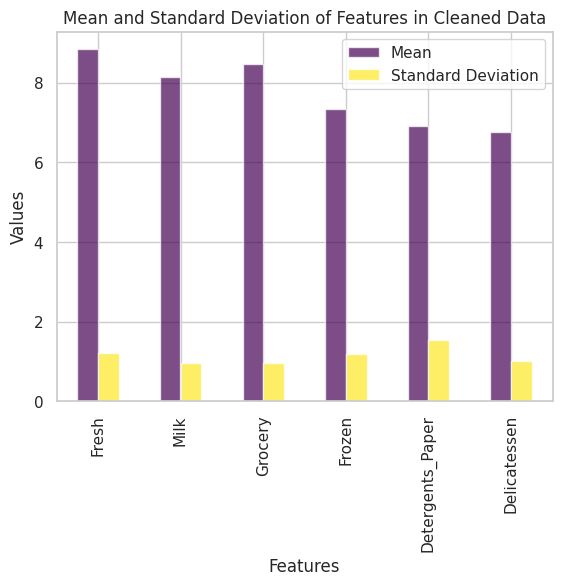

In [63]:
# Calculate mean and standard deviation
stats = clean_data.describe().loc[['mean', 'std']]

# Transpose the DataFrame
stats_t = stats.transpose()

# Create a bar plot using matplotlib with colormap='viridis'
plt.figure(figsize=(12, 6))
stats_t.plot(kind='bar', y=['mean', 'std'], alpha=0.7, colormap='viridis')
plt.title('Mean and Standard Deviation of Features in Cleaned Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(["Mean", "Standard Deviation"])
plt.show()



16. How much approximately the first and second features of explain of variance in total? (1 point)



In [64]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(clean_data)  # Assuming `data_clean` is the cleaned dataset

# Get explained variance ratios
var_ratio = pca.explained_variance_ratio_

# Print the explained variance for PC1 and PC2
print(f"Explained Variance - PC1: {var_ratio[0]:.4f}")
print(f"Explained Variance - PC2: {var_ratio[1]:.4f}")

# Print the cumulative explained variance for the first two components
cum_var_ratio = var_ratio.cumsum()
print(f"Cumulative Explained Variance (PC1 + PC2): {cum_var_ratio[1]:.4f}")


Explained Variance - PC1: 0.4914
Explained Variance - PC2: 0.2408
Cumulative Explained Variance (PC1 + PC2): 0.7321


---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---